In [213]:
from keras.datasets import boston_housing

(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()
#targets and not labels because we are in regression, so we want an outcome value, not a category

In [214]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [215]:
import numpy as np
length = [len (x) for x in train_data]#list comprehension
print('min:',np.min(train_targets))
print('max:',np.max(train_targets))
print('avg:',np.mean(train_targets))
print('stdv:',np.std(train_targets))
print(len(train_targets))
print(len(train_data))

min: 5.0
max: 50.0
avg: 22.395049504950492
stdv: 9.199035423364862
404
404


In [216]:
import pandas as pd

In [217]:
df = pd.DataFrame(train_data)

In [218]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26


In [219]:
price = pd.DataFrame(train_targets)

In [220]:
price.head(3)

,0
0,15.2
1,42.3
2,50.0


In [221]:
print('avg:',np.mean(df[12]))

avg: 12.740816831683164


In [222]:
print((train_data.shape))

(404, 13)


In [223]:
frames = [df,price]
total = pd.concat(frames, axis = 1)

In [224]:
names = ['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j','k', 'l', 'm', 'PRICE']
total.columns = names
total.head(2)

,a,b,c,d,e,f,g,h,i,j,k,l,m,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3


In [225]:
print('min', np.min(train_data, axis = 0))#for each attribute (13 columns)
print('mean', np.mean(train_data, axis = 0))
print('std', np.std(train_data, axis = 0))
print('max', np.max(train_data, axis = 0))

min [6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
mean [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
std [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
max [ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


In [226]:
(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()
#WE NEED TO NORMALIZE OUR DATA
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /=std

In [227]:
print('min', np.min(train_data, axis = 0))#
print('mean', np.mean(train_data, axis = 0))
print('std', np.std(train_data, axis = 0))
print('max', np.max(train_data, axis = 0))

min [-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]
mean [-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]
std [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
max [9.23484718 3.72899018 2.44537425 3.89358447 2.67733525 3.46718635
 1.11048828 3.43740568 1.67588577 1.83609694 1.60353052 0.44807713
 3.48201936]


In [228]:
#we have 404 samples (houses). we can split it into 4*101

In [229]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,
                           activation = 'relu',
                           input_shape = (train_data.shape[1],)
                            ))
    model.add(layers.Dense(64,activation = 'relu'))                           
    model.add(layers.Dense(1))    
    model.compile(
            optimizer = 'rmsprop',
            loss = 'mse',#mean squared error
            metrics = ['mae']#mean absolute error
            
    )
    return model

test_model = build_model()
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_110 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [230]:
k = 4
num_val_samples = len(train_data)//k#integer division
num_epochs = 300 #Epoch: Cycle of training on the whole network. TODO: change to 100
all_scores = []
all_histories = []
all_models = []

for i in range(k):
    print('Fold:',str(i+1))
    
    #validation and training as follows, in blocks of 101
   
    #V T T T
    #T V T T
    #T T V T
    #T T T V
    
    #select the Vs in the upper matrix
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
   
    #selects the Ts in the upper matrix
    train_data_left = train_data[0:(i*num_val_samples)]
    train_data_right = train_data[(i+1)*num_val_samples:]
    
    partial_train_data = np.concatenate(
        [train_data_left,train_data_right],
        axis = 0)
    
    
    train_targets_left = train_targets[0:(i*num_val_samples)]
    train_targets_right = train_targets[(i+1)*num_val_samples:]
    
    partial_train_targets = np.concatenate(
    [train_targets_left, train_targets_right],
        axis = 0
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets, #x,y
        epochs = num_epochs,
        batch_size = 1,
        verbose = 0,
        validation_data = (val_data, val_targets)
        )
    model.save(str(i+1) + '-model.h5')
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    all_histories.append(history)
    all_models.append(model)

Fold: 1
101/101 [==============================] - 0s 128us/step
Fold: 2
101/101 [==============================] - 0s 165us/step
Fold: 3
101/101 [==============================] - 0s 187us/step
Fold: 4
101/101 [==============================] - 0s 127us/step


In [231]:
print(all_scores)
print(all_histories)
print(all_models)

[2.6365761119540374, 3.261477815042628, 2.9447606624943194, 2.9599256893195727]
[<keras.callbacks.History object at 0x00000256622DB630>, <keras.callbacks.History object at 0x0000025661CE4B38>, <keras.callbacks.History object at 0x0000025660880518>, <keras.callbacks.History object at 0x000002565DD4EF98>]
[<keras.engine.sequential.Sequential object at 0x00000256622C5A20>, <keras.engine.sequential.Sequential object at 0x000002565DD12E48>, <keras.engine.sequential.Sequential object at 0x0000025661CE4208>, <keras.engine.sequential.Sequential object at 0x000002565F33DF28>]


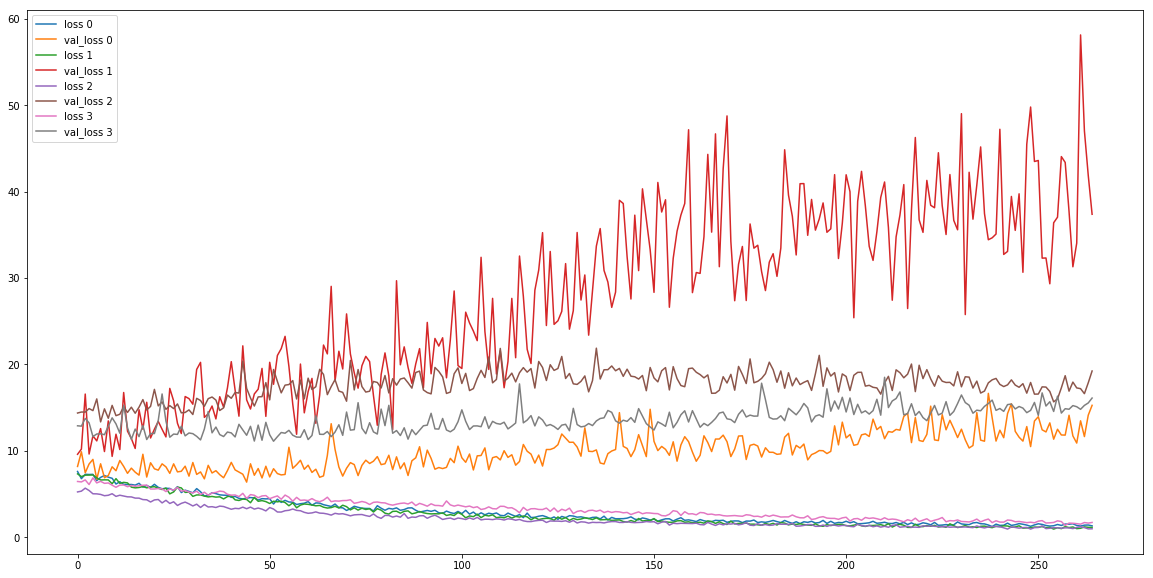

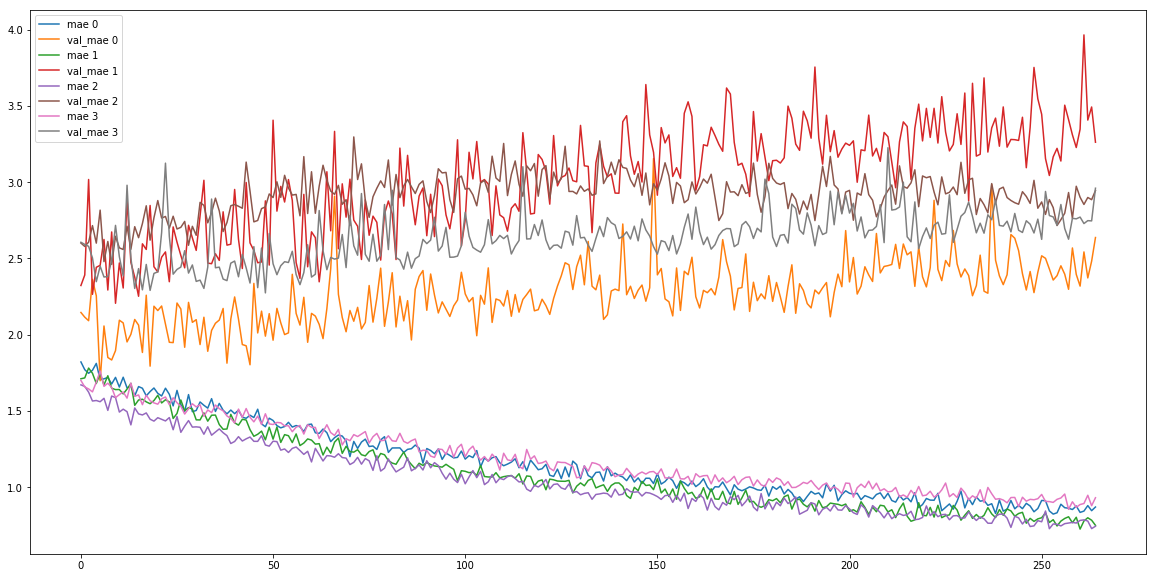

In [253]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
for i,history in enumerate(all_histories):
    r = range(len(history.history['loss'][35:]) + 1)
    plt.plot(history.history['loss'][35:], label = 'loss %s' %i)
    plt.legend()
    r = range(len(history.history['loss'][35:]) + 1)
    plt.plot(history.history['val_loss'][35:],label = 'val_loss %s' %i)
    plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(20,10))
for i,history in enumerate(all_histories):
    
    r = range(len(history.history['mean_absolute_error'][35:]) + 1)
    plt.plot(history.history['mean_absolute_error'][35:], label = 'mae %s' %i)
    plt.legend()
    r = range(len(history.history['val_mean_absolute_error'][35:]) + 1)
    plt.plot(history.history['val_mean_absolute_error'][35:], label = 'val_mae %s' %i)
    plt.legend()
plt.show()
plt.close()



In [254]:
model = models.load_model('1-model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_113 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [255]:
model = models.load_model('3-model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_119 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
